# Creating Bag of Words Model

model that converts text to numbers i.e. the Bag of Words (BOW)

## Theory Behind Bag of Words Approach

## Step 1: Tokenize the Sentences

## Step 2: Create a Dictionary of Word Frequency

create a dictionary that contains all the words in our corpus as keys and the frequency of the occurrence of the words as values. In other words, we need to create a histogram of the words in our corpus

The words with very small frequency are not very useful, hence such words are removed. One way to remove the words with less frequency is to sort the word frequency dictionary in the decreasing order of the frequency and then filter the words having a frequency higher than a certain threshold. 

## Creating the Bag of Words Model

To create the bag of words model, we need to create a matrix where the columns
correspond to the most frequent words in our dictionary where rows correspond to the document or sentences. 

# Bag of Words Model in Python

In [3]:
import nltk 
import numpy as np 
import random 
import string
import bs4 as bs 
import urllib.request 
import re

## scrape the Wikipedia article on natural language processing

In [5]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing') 
raw_html = raw_html.read()

article_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = article_html.find_all('p')
article_text = ''

## create a complete corpus by concatenating all the paragraphs
for para in article_paragraphs: 
    article_text += para.text
    
##  split the corpus into individual sentences
corpus = nltk.sent_tokenize(article_text)

## Removing punctuation

In [6]:
for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

In [7]:
print(len(corpus))
print(corpus[30])

58
in the 2010s representation learning and deep neural network style machine learning methods became widespread in natural language processing due in part to a flurry of results showing that such techniques 4 5 can achieve state of the art results in many natural language tasks for example in language modeling 6 parsing 7 8 and many others 


## tokenize the sentences

to tokenize the sentences in the corpus and create a dictionary that contains words and their corresponding frequencies in the corpus

In [8]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

## filter the top 200 most frequently occurring words.

In [9]:
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

## convert corpus into their corresponding vector representation.

In [10]:
sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [11]:
sentence_vectors = np.asarray(sentence_vectors)

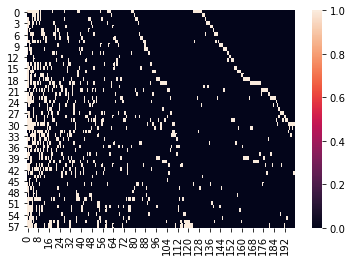

In [13]:
import seaborn as sns
sns.heatmap(sentence_vectors)